In [8]:
import os

import pandas as pd
import numpy as np
import seaborn as sns

from glob import glob
from itertools import chain
from collections import Counter
from tqdm.auto import tqdm

In [13]:
BASE_DIR = "/Users/artemvopilov/Programming/yandex_cup_2023"

In [22]:
DATA_DIR = f"{BASE_DIR}/data"
EMBEDDINGS_DIR = f"{BASE_DIR}/embeddings"

In [15]:
TRAIN_DF_PATH = f"{DATA_DIR}/train.csv"
TEST_DF_PATH = f"{DATA_DIR}/test.csv"

### Data

In [25]:
train_df = pd.read_csv(TRAIN_DF_PATH)
test_df = pd.read_csv(TEST_DF_PATH)

In [26]:
train_df.head()

,track,tags
0,49734,"5,6,9,26,32,55,96"
1,67845,"6,9,28,39,145,155"
2,25302,"0,6,28,40,116,168"
3,57796,"28,186"
4,13676,"6,23,177"


In [27]:
train_df.shape

(51134, 2)

In [28]:
train_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51134 entries, 0 to 51133
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   track   51134 non-null  int64 
 1   tags    51134 non-null  object
dtypes: int64(1), object(1)
memory usage: 799.1+ KB


In [29]:
train_df["track"].nunique()

51134

In [30]:
track_tags = train_df["tags"].map(lambda t: list(map(int, t.split(",")))).values

In [31]:
tags = list(chain.from_iterable(track_tags))

In [32]:
tag_counts = Counter(tags)

In [36]:
len(tag_counts)

256

In [33]:
tag_counts

Counter({0: 20095,
         1: 18519,
         2: 7139,
         6: 6270,
         5: 5217,
         3: 4777,
         9: 3905,
         23: 3299,
         12: 2815,
         11: 2701,
         15: 2312,
         28: 2121,
         35: 2031,
         4: 1929,
         17: 1895,
         43: 1726,
         13: 1664,
         8: 1636,
         7: 1631,
         21: 1529,
         10: 1518,
         25: 1327,
         18: 1325,
         32: 1236,
         31: 1188,
         29: 1143,
         19: 1141,
         26: 1118,
         47: 1117,
         16: 1090,
         14: 1044,
         39: 1007,
         24: 1001,
         37: 980,
         22: 971,
         50: 944,
         40: 926,
         20: 922,
         45: 893,
         30: 873,
         64: 866,
         54: 850,
         44: 827,
         33: 814,
         62: 770,
         38: 766,
         70: 756,
         99: 748,
         81: 742,
         46: 731,
         58: 709,
         74: 698,
         27: 682,
         96: 681,
   

<Axes: ylabel='Count'>

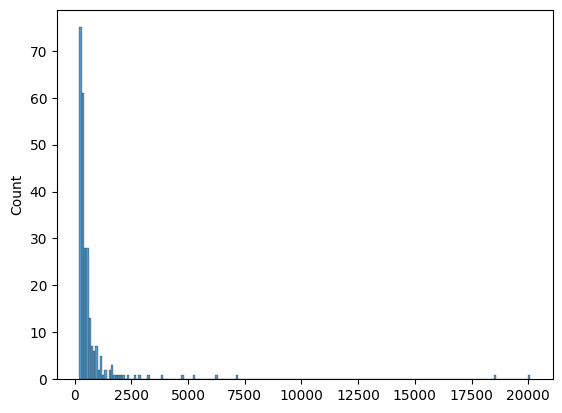

In [35]:
sns.histplot(tag_counts)

### Embeddings

In [16]:
track_id_to_embeddings = {}
for fn in tqdm(os.listdir(EMBEDDINGS_DIR)):
    fp = f"{EMBEDDINGS_DIR}/{fn}"

    track_id = fn.split('.')[0]
    embeddings = np.load(fp)
    track_id_to_embeddings[track_id] = embeddings

  0%|          | 0/76714 [00:00<?, ?it/s]

In [20]:
norms = [np.mean([np.linalg.norm(e) for e in embeds]) for embeds in tqdm(track_id_to_embeddings.values())]

  0%|          | 0/76714 [00:00<?, ?it/s]

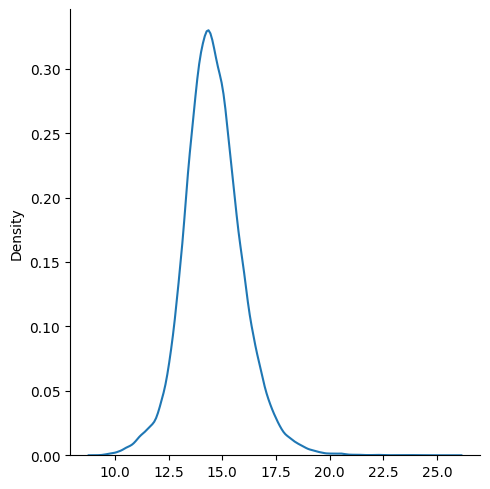

In [21]:
sns.displot(norms, kind="kde")